## 설치

CRFAT

In [1]:
!git clone https://github.com/clovaai/CRAFT-pytorch.git

Cloning into 'CRAFT-pytorch'...
remote: Enumerating objects: 56, done.
remote: Total 56 (delta 0), reused 0 (delta 0), pack-reused 56
Unpacking objects: 100% (56/56), done.


In [2]:
!wget --no-check-certificate -c 'https://docs.google.com/uc?export=download&id=1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ' -O CRAFT-pytorch/craft.pth

--2020-07-03 03:33:26--  https://docs.google.com/uc?export=download&id=1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ
Resolving docs.google.com (docs.google.com)... 172.217.7.142, 2607:f8b0:4004:805::200e
Connecting to docs.google.com (docs.google.com)|172.217.7.142|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b39gblafj26eh2j5uo645tgnt763snja/1593747150000/05173585031594261940/*/1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ?e=download [following]
--2020-07-03 03:33:28--  https://doc-0k-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b39gblafj26eh2j5uo645tgnt763snja/1593747150000/05173585031594261940/*/1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ?e=download
Resolving doc-0k-9g-docs.googleusercontent.com (doc-0k-9g-docs.googleusercontent.com)... 172.217.9.193, 2607:f8b0:4004:806::2001
Connecting to doc-0k-9g-docs.googleusercontent.com (doc-0k-9g-docs.googleus

Tesseract

In [3]:
!sudo apt install tesseract-ocr libtesseract-dev tesseract-ocr-kor
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev tesseract-ocr tesseract-ocr-eng
  tesseract-ocr-kor tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 33 not upgraded.
Need to get 8,600 kB of archives.
After this operation, 31.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 k

## 이미지 열기

In [4]:
import pandas as pd
import PIL
import pytesseract
from IPython.display import display

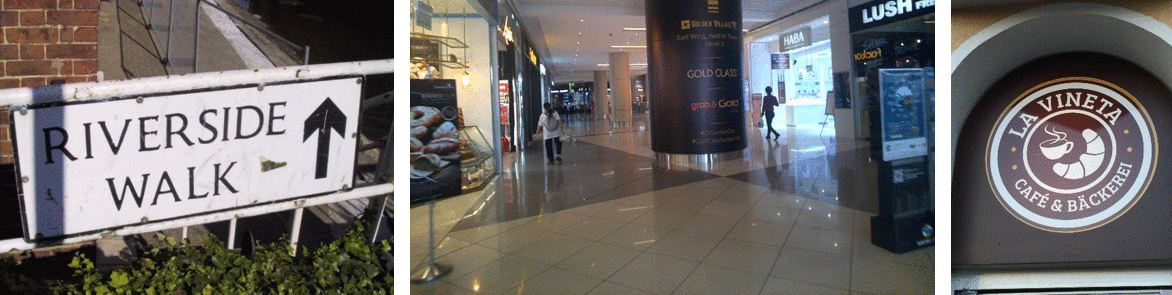

In [5]:
img = PIL.Image.open('CRAFT-pytorch/figures/craft_example.gif')
img

## 테서렉트 OCR

In [6]:
text = pytesseract.image_to_string(img.convert('L'), lang='eng+kor')
print(text)

## CRAFT로 이미지 영역을 추출 후 테서렉트로 OCR

CRAFT에서 이미지 영역 추출

In [7]:
!cd CRAFT-pytorch && python test.py --trained_model=craft.pth --test_folder=figures

Loading weights from checkpoint (craft.pth)
elapsed time : 0.42203307151794434s


각 영역별 이미지 추출

In [8]:
positions = pd.read_csv('CRAFT-pytorch/result/res_craft_example.txt', header=None)

In [9]:
regions = []
for row in positions.itertuples():
    i, x1, y1, x2, y2, x3, y3, x4, y4 = row
    left = min(x1, x4)
    right = max(x2, x3)
    upper = min(y1, y2)
    lower = max(y3, y4)
    reg = img.crop((left, upper, right, lower))
    regions.append(reg)

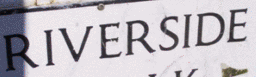

In [10]:
regions[6]

각 영역의 텍스트 추출

Tid


Pal


Gob


CLASS


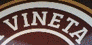

SILT,


Pel


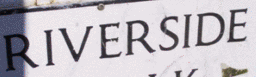

B | VERSIDE


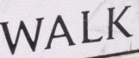

WALK


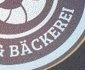

J


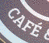

es


rt


In [11]:
for reg in regions:
    text = pytesseract.image_to_string(reg, config='--psm 8', lang='eng')
    display(reg)
    print(text)

In [27]:
#@title Camera Capture
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
except Exception as err:
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg


In [28]:
!mv photo.jpg CRAFT-pytorch/figures && cd CRAFT-pytorch && python test.py --trained_model=craft.pth --test_folder=figures

Loading weights from checkpoint (craft.pth)
elapsed time : 0.20184588432312012s


In [29]:
positions = pd.read_csv('CRAFT-pytorch/result/res_photo.txt', header=None)
img = PIL.Image.open('CRAFT-pytorch/figures/photo.jpg')

In [ ]:
for row in positions.itertuples():
    i, x1, y1, x2, y2, x3, y3, x4, y4 = row
    left = min(x1, x4)
    right = max(x2, x3)
    upper = min(y1, y2)
    lower = max(y3, y4)
    reg = img.crop((left, upper, right, lower))
    text = pytesseract.image_to_string(reg, config='--psm 8', lang='eng+kor')
    display(reg)
    print(text)